# Let's Build an Encoder (Part 2): 
# (Encoder Module) [Task 2]

### Recap of the Full process
- Given a Corpus of Text (List of Sentences)
- **Normalize** each sentence
  - Lower case
  - Lemmatization & Stemming
  - Remove symbols
- Apply **Tokenization** on the normalized sentence
- Build **Vocabulary** of such Tokens
- **Encode** the tokens given their IDs
- Apply **Padding** on each Sequence of IDs

### Illustrative Figure For Encoder Pipeline

![Encoder-Pipeline](../imgs/Encoder-Pipeline.png)

### Illustrative Questions 📝🙌

- Why need to insert `review_series` as input to `Encoder`?
  - To build the ***`vocab`, `w2i` & `i2w`***
- What is the usage of `w2i` & `i2w`?
  - `w2i` --> will be used within the `encode` method
  - `i2w` --> will be used within the `decode` method
- why need the **`decode`** method?
  - Currently it has no need ... since the model will predict 1 or 0 (+ve or -ve)
  - But If we are building a translation model ... then it will take a sequence of ids as input & outputs another sequence of ids (for the other language) 
    by which we should map (`decode`) them into tokens again ... to understand model output
- Why need the **Padding & Truncation** method?
  - To make all input (or given batch) having the same size before inserting it to the Model
- What is the ***sequence for the encoder*** to process the data?
  - 1: Initiate it `encoder = Encoder(df)` with input data-frame
  - 2: Apply **pre-processing pipeline** on the review column into tokens
  - 3: **Drop rows** which have less tokens than the `min_length`
  - 4: Build `vocab`, `w2i` & `i2w` given such cleaned tokens
  - 5: Now `encoder` instance ready to be sent to the `Dataset` module (Torch module)
       which will be encoding the reviews one-by-one (or in the batch mode) using the 
       `encode_plus` method which apply Padding & Truncation of the given batch using the `max-length` parameter
- How can we specifiy the `max-length`?
  - Can be the mean or median length of the tokens
  - For Best Practice ... make a plot which represents the ***distribution of the tokens' lengths*** of the given data ... and decide at which point we can select that parameter ... *where the majority of the reviews are less than such value*

### Import Packages

In [ ]:
from itertools import chain
import pandas  as pd
import numpy as np
from typing import List, Any
import pandas as pd
import numpy as np
from utils import Constant as C
from utils import preprocess_review

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

### Encoder Class

In [38]:
class Encoder():

    def __init__(self, text_series: pd.Series, max_length: int) -> None:

        self.text_series = text_series
        self.max_length = max_length

    def create_vocab(self) -> list:
        """Store the list of all unique tokens
        Given the `text_series_tokenized` series, (created from the __call__ method ⬇⬇)
        which should contain all reviews preprocessed & Tokenized
        """
        self.vocab = ...

    def create_w2i(self) -> dict:
        """Create mapping of tokens to digits
        i.e.:
            {"[PAD]": 0, "[OOV]":1, w_0: 2, w_1: 3, ...}
        """
        self.w2i = ...

    def create_i2w(self) -> dict:
        """Create mapping of digits to tokens
        i.e.:
            {0:"[PAD]", 1:"[OOV]", 2: w_0, 3: w_1, ...}
        """
        self.i2w = ...

    def pad_truncate(self, text_idxs: List[int], max_length: int) -> List[int]:
        """Apply Padding / Truncation of the encoded tokens based on the max-length param

        Args:
            text_idxs (List[int]): list of encoded tokens
            max_length (int): max-length for all 

        Returns:
            List[int]: list of encoded tokens with size max-length
        """
        return ...

    def encode(self, text_tokens: List[str]) -> List[int]:
        """Convert review string into list of encoded tokens (using the w2i dictionary)

        Args:
            text_tokens (List[str]): review tokens (aftore preprocessing done)

        Returns:
            List[int]: list of encoded tokens
        """
        token_idxs = ...
        return token_idxs

    def encode_plus(self, text: str, max_len: int) -> List[int]:
        """Same as encode unless 
        - It takes a string (not list of tokens) so it needs to 
        - Apply the pre-processing methods
        - then encode it into indices
        - finally padd and truncate the sequence based on the `max_len` argument

        Args:
            text (str): user review
            max_len (int): maximum number of tokens given the input review

        Returns:
            List[int]: list of padded & encoded tokens
        """

        text_tokens_pdd = ...
        return text_tokens_pdd

    def decode(self, token_idxs: List[int], clean=False) -> List[str]:
        """Convert encoded tokens into words (using the i2w dictionary)

        Args:
            idxs (List[int]): list of token indices
            clean (bool): flag whether to remove 'OOV' & 'PAD' from the results

        Returns:
            List[str]: list of words correspondigly
        """
        if clean:
            # remove OOV & PAD
            return ...
        # leave the special tokens as is
        return ...

    def __call__(self, *args: Any, **kwds: Any) -> Any:
        # apply pre-processing on all the given input pd.Series
        self.text_tokens_series = ...
        # - Build the vocab
        # Note: use the `text_tokens_series` variable to fetch all the unique words of the given series
        ...
        # Build the W2I
        ...
        # Build the I2W
        ...

        print(f"Vocab Size= {len(self.vocab):,} Unique Token")


### Reading Data
You can download the dataset from the [Kaggle platform](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)

In [40]:
file_path = "path/to/data/Reviews.csv"
df  = pd.read_csv(file_path)

### Simple Preprocessing
- Choose the `Text` & `Score` columns only 
- Drop the Duplicates

In [41]:
df = ...

In [53]:
print(f"There Exist {df.shape[0]:,} reviews")

There Exist 393,675 reviews


### Setting the `max-length` of the Encoder

Here will be showing the distribution of the tokens to decide what value can be good enough for our encoder to stick with  

Will make a simple Tokenizer just for plotting purposes
- simply split the text into List of strings (using `.split()` method)
- Create a new column (`Text_len`) which will hold the `length` of the tokens 
- Plot the Tokens Lengths Distribution using the `sns.distplot` seaborn method


In [43]:

df['Text_len'] = ...

##### Plotting the Tokens' Distributions

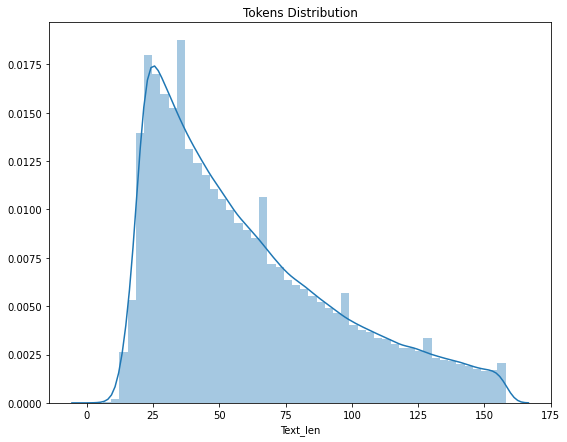

In [54]:
plt.subplots(figsize=(9, 7))
sns.distplot(df[df['Text_len'] < df['Text_len'].quantile(0.9)]['Text_len'])
plt.title("Tokens Distribution")
plt.show()

In [45]:
df['Text_len'].describe()

count    393675.000000
mean         79.764803
std          77.175283
min           3.000000
25%          34.000000
50%          57.000000
75%          97.000000
max        3432.000000
Name: Text_len, dtype: float64

Here we can see the tokens distribution, that setting the `median (57)` as the max-length of the Encoder will be a good choice, since the distribution is right skewed

In [46]:
max_length = int(df['Text_len'].quantile(0.5))
max_length

57

### Call the Encoder Module

In [47]:
encoder = ...

In [48]:
encoder()

Vocab Size= 498,650 Unique Token


In [49]:
review_ex = "The Food is pretty Delicious Isn't it :D love it"
token_enc = encoder.encode_plus(review_ex, max_length)
token_enc

array([ 74610, 146484, 492842,  18453, 381657, 137304,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0])

In [50]:
encoder.decode(token_enc, clean=True)

['food', 'pretty', 'delicious', "isn't", ':d', 'love']

## Awesome 🥳🎉
Now That you had learned to ***build an Encoder from Scratch***, and knows all the nitty griddy parts to modify any Framework's tokenizers or encoders (i.e *TorchText, Spacy, tensorflow, transformers* ...etc)

### Next Station 🚌⏭
- Then will build an ***E2E Deep-Learning model using the Torch framework*** that predicts the sentiment given the user review Using our `Encoder` Module
